In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



X_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None)


X_test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', header=None)



print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')


print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))


if np.min(y_train) == 1 and np.max(y_train) == 6:
    y_train = y_train - 1
if np.min(y_test) == 1 and np.max(y_test) == 6:
    y_test = y_test - 1

print("Adjusted unique values in y_train:", np.unique(y_train))
print("Adjusted unique values in y_test:", np.unique(y_test))

<ipython-input-4-5ad55d215207>:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
<ipython-input-4-5ad55d215207>:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)


X_train shape: (7352, 561), y_train shape: (7352, 1)
X_test shape: (2947, 561), y_test shape: (2947, 1)
Unique values in y_train: [1 2 3 4 5 6]
Unique values in y_test: [1 2 3 4 5 6]
Adjusted unique values in y_train: [0 1 2 3 4 5]
Adjusted unique values in y_test: [0 1 2 3 4 5]


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1], 1)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

VALID PADDING WITHOUT STRIDE

In [6]:
model = Sequential()


model.add(Conv1D(filters=64, kernel_size=3, activation='relu',padding='valid', input_shape=(X_train.shape[1], 1)))


model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu',padding='valid'))


model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 559, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 279, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 277, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 138, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 17664)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,261,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,286,854 (8.72 MB)

 Trainable params: 2,286,854 (8.72 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 43s 175ms/step - accuracy: 0.6194 - loss: 0.8862 - val_accuracy: 0.9318 - val_loss: 0.1729
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 32s 137ms/step - accuracy: 0.9265 - loss: 0.1865 - val_accuracy: 0.8989 - val_loss: 0.2721
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 25s 109ms/step - accuracy: 0.9548 - loss: 0.1300 - val_accuracy: 0.9172 - val_loss: 0.2227
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 48s 138ms/step - accuracy: 0.9661 - loss: 0.0883 - val_accuracy: 0.9379 - val_loss: 0.1663
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 37s 123ms/step - accuracy: 0.9776 - loss: 0.0635 - val_accuracy: 0.9454 - val_loss: 0.1450
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 40s 120ms/step - accuracy: 0.9798 - loss: 0.0550 - val_accuracy: 0.9532 - val_loss: 0.1202
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 52s 166ms/step - accuracy: 0.9773 - loss: 0.0588 - val_accuracy: 0.9484 - val_loss: 0.1563
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 29s 114ms/step - accuracy: 0.9838 - loss: 0

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9485 - loss: 0.1765
Test Accuracy: 0.9525


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.04      0.08       496
           1       0.95      0.34      0.50       471
           2       0.35      0.99      0.52       420
           3       0.90      0.65      0.75       491
           4       0.91      0.64      0.75       532
           5       0.64      1.00      0.78       537

    accuracy                           0.61      2947
   macro avg       0.79      0.61      0.56      2947
weighted avg       0.80      0.61      0.57      2947



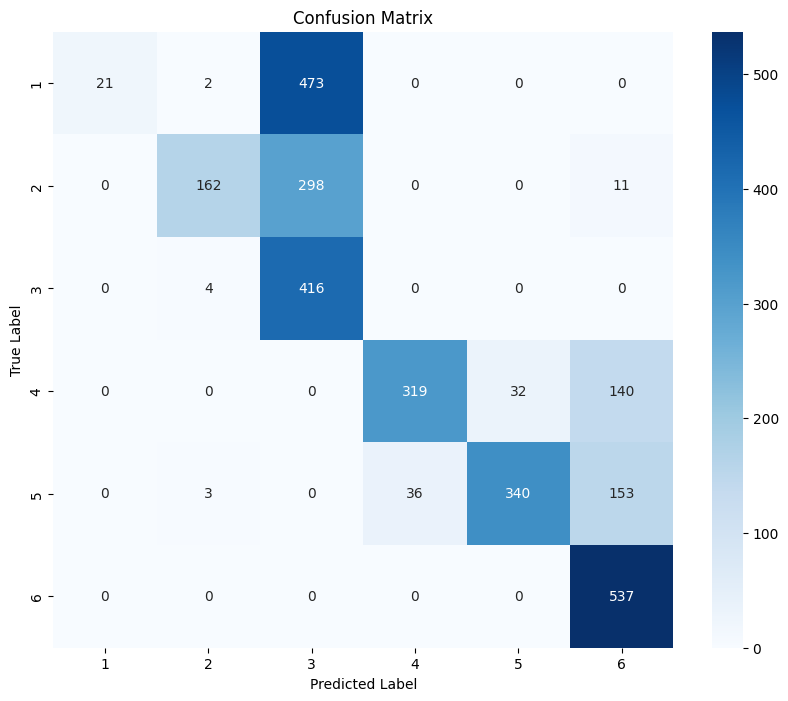

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


y_pred = model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = y_test


print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))


conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

SAME PADDING WITHOUT STRIDE

In [12]:
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu',padding='same', input_shape=(X_train.shape[1], 1)))


model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu',padding='same'))


model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())


model.add(Dense(128, activation='relu'))


model.add(Dropout(0.5))


model.add(Dense(6, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 561, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 280, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 280, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 140, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 17920)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       2,293,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,319,622 (8.85 MB)

 Trainable params: 2,319,622 (8.85 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history1 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 34s 139ms/step - accuracy: 0.6118 - loss: 0.8854 - val_accuracy: 0.9379 - val_loss: 0.1870
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 45s 197ms/step - accuracy: 0.9236 - loss: 0.2082 - val_accuracy: 0.9501 - val_loss: 0.1307
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 70s 145ms/step - accuracy: 0.9497 - loss: 0.1343 - val_accuracy: 0.9379 - val_loss: 0.1504
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 33s 111ms/step - accuracy: 0.9621 - loss: 0.0979 - val_accuracy: 0.9481 - val_loss: 0.1299
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.9692 - loss: 0.0813 - val_accuracy: 0.9444 - val_loss: 0.1641
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - accuracy: 0.9734 - loss: 0.0761 - val_accuracy: 0.9525 - val_loss: 0.1458
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.9832 - loss: 0.0542 - val_accuracy: 0.9617 - val_loss: 0.1165
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 43s 103ms/step - accuracy: 0.9799 - loss: 0.0

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9511 - loss: 0.1598
Test Accuracy: 0.9569


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.03      0.06       496
           1       0.88      0.42      0.57       471
           2       0.36      0.99      0.53       420
           3       0.88      0.69      0.78       491
           4       0.88      0.79      0.83       532
           5       0.80      1.00      0.89       537

    accuracy                           0.65      2947
   macro avg       0.78      0.66      0.61      2947
weighted avg       0.79      0.65      0.62      2947



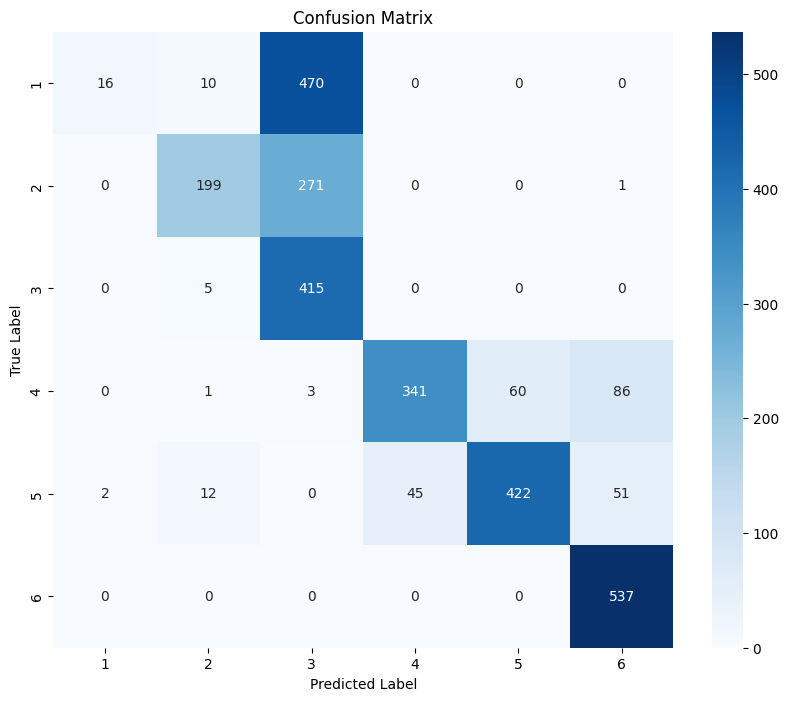

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes =y_test


print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))


conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

SAME PADDING WITH STRIDE

In [17]:
model = Sequential()


model.add(Conv1D(filters=64, kernel_size=3, activation='relu',padding='same',strides=2, input_shape=(X_train.shape[1], 1)))

model.add(MaxPooling1D(pool_size=2))


model.add(Conv1D(filters=128, kernel_size=3, activation='relu',padding='same',strides=2))


model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 281, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 140, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 70, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 35, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4480)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         573,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 599,302 (2.29 MB)

 Trainable params: 599,302 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history1 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.6095 - loss: 0.9069 - val_accuracy: 0.9199 - val_loss: 0.2195
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9286 - loss: 0.1973 - val_accuracy: 0.9250 - val_loss: 0.1835
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.9547 - loss: 0.1287 - val_accuracy: 0.9386 - val_loss: 0.1547
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9670 - loss: 0.0902 - val_accuracy: 0.9433 - val_loss: 0.1489
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9727 - loss: 0.0727 - val_accuracy: 0.9508 - val_loss: 0.1292
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9801 - loss: 0.0565 - val_accuracy: 0.9559 - val_loss: 0.1239
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9814 - loss: 0.0513 - val_accuracy: 0.9491 - val_loss: 0.1375
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9852 - loss: 0.0493 - val_a

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9568 - loss: 0.1344
Test Accuracy: 0.9457


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.27      0.42       496
           1       0.93      0.26      0.41       471
           2       0.38      0.99      0.55       420
           3       0.90      0.50      0.65       491
           4       0.90      0.59      0.71       532
           5       0.56      1.00      0.71       537

    accuracy                           0.60      2947
   macro avg       0.77      0.60      0.58      2947
weighted avg       0.77      0.60      0.58      2947



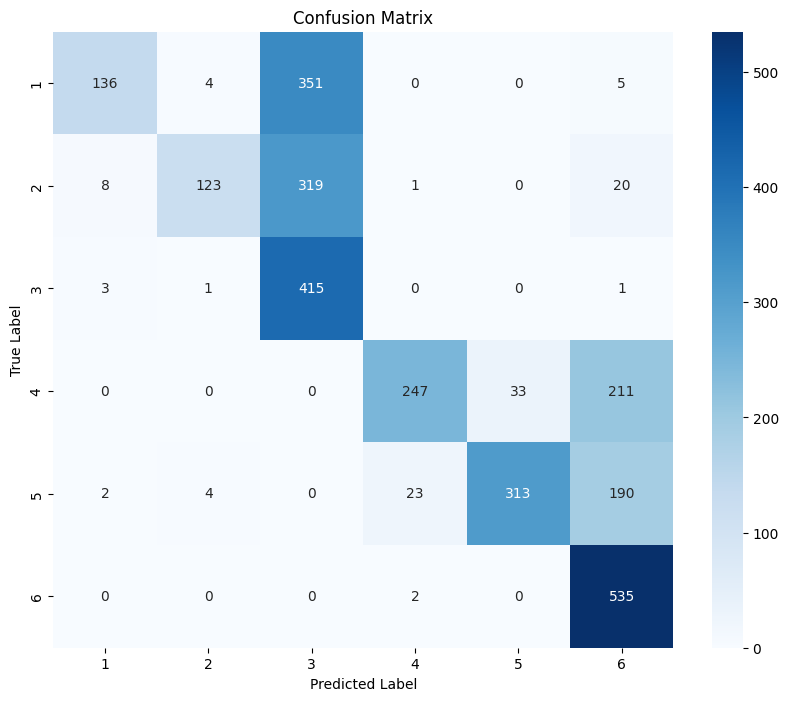

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = y_test


print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))


conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



  VALID PADDING WITH STRIDES

In [22]:
model = Sequential()


model.add(Conv1D(filters=64, kernel_size=3, activation='relu',padding='valid',strides=2, input_shape=(X_train.shape[1], 1)))


model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu',padding='valid',strides=2))

model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 280, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 140, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 69, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 34, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4352)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         557,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 582,918 (2.22 MB)

 Trainable params: 582,918 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history2 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.5965 - loss: 0.9516 - val_accuracy: 0.9189 - val_loss: 0.2124
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9187 - loss: 0.2228 - val_accuracy: 0.9233 - val_loss: 0.1840
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9531 - loss: 0.1335 - val_accuracy: 0.9494 - val_loss: 0.1237
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9678 - loss: 0.0938 - val_accuracy: 0.9545 - val_loss: 0.1231
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9752 - loss: 0.0708 - val_accuracy: 0.9552 - val_loss: 0.1115
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9762 - loss: 0.0652 - val_accuracy: 0.9549 - val_loss: 0.1295
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9823 - loss: 0.0536 - val_accuracy: 0.9555 - val_loss: 0.1173
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9858 - loss: 0.0403 - val_a

In [25]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9575 - loss: 0.1193
Test Accuracy: 0.9600


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.21      0.34       496
           1       0.69      0.87      0.77       471
           2       0.54      0.89      0.67       420
           3       0.89      0.25      0.39       491
           4       0.87      0.54      0.66       532
           5       0.49      0.99      0.66       537

    accuracy                           0.62      2947
   macro avg       0.75      0.63      0.58      2947
weighted avg       0.75      0.62      0.58      2947



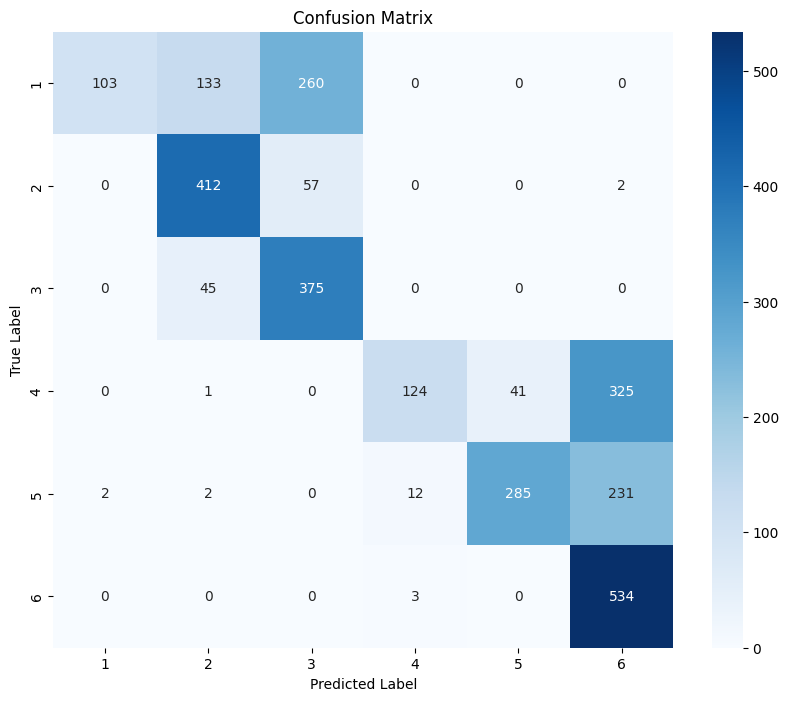

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = y_test


print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))


conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()